# Spotify History Analysis

## Introduction
This notebook analyzes your Spotify listening history to provide insights into your listening patterns, top artists, top tracks, and more. The analysis is done using Python and the following libraries:
- **pandas**: For data manipulation and analysis.
- **seaborn**: For statistical data visualization.
- **matplotlib**: For creating static, animated, and interactive visualizations.

## Data Loading
First, we load the `spotify_history.csv` dataset into a pandas DataFrame. This dataset contains your listening history, including track name, artist name, album name, and other details.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Load the dataset
df = pd.read_csv('spotify_history.csv')

## Data Overview
Let's take a look at the first few rows of the dataset to understand its structure and the type of data it contains.

In [2]:
df.head()

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False


## Top 10 Artists by Play Count

In [3]:
artist_play_count_df = df.groupby('artist_name').agg({'ms_played': 'sum'}).reset_index()
artist_play_count_df.columns = ['artist', 'play_count']
top_artists_by_play_count = artist_play_count_df.sort_values(by='play_count', ascending=False).head(10)
top_artists_by_play_count

,artist,play_count
3500,The Beatles,1210184552
3602,The Killers,1059556516
1773,John Mayer,725219443
465,Bob Dylan,569456396
2858,Paul McCartney,357354370
1511,Howard Shore,348930675
3708,The Strokes,317508419
3684,The Rolling Stones,307917009
2934,Pink Floyd,260531842
2093,Led Zeppelin,248338279


## Top 10 Tracks by Play Count

In [4]:
track_play_count_df = df.groupby('track_name').agg({'ms_played': 'sum'}).reset_index()
track_play_count_df.columns = ['track', 'play_count']
top_tracks_by_play_count = track_play_count_df.sort_values(by='play_count', ascending=False).head(10)
top_tracks_by_play_count

,track,play_count
8406,Ode To The Mets,67431580
11797,The Return of the King (feat. Sir James Galway...,64401661
11538,The Fellowship Reunited (feat. Sir James Galwa...,44756730
82,19 Dias y 500 Noches - En Directo,42914042
5767,In the Blood,38427087
2137,Claudia's Theme - Version Eight,37120900
3136,Dying Breed,36182653
11451,"The Breaking of the Fellowship (feat. ""In Drea...",35990898
550,All These Things That I've Done,35754915
1937,Caution,35619945


## Total Playtime

In [5]:
total_playtime_ms = df['ms_played'].sum()
total_playtime_hours = total_playtime_ms / (1000 * 60 * 60)
print(f'Total Playtime (hours): {total_playtime_hours:.2f}')

Total Playtime (hours): 5341.54


## Distribution of Song Playtimes

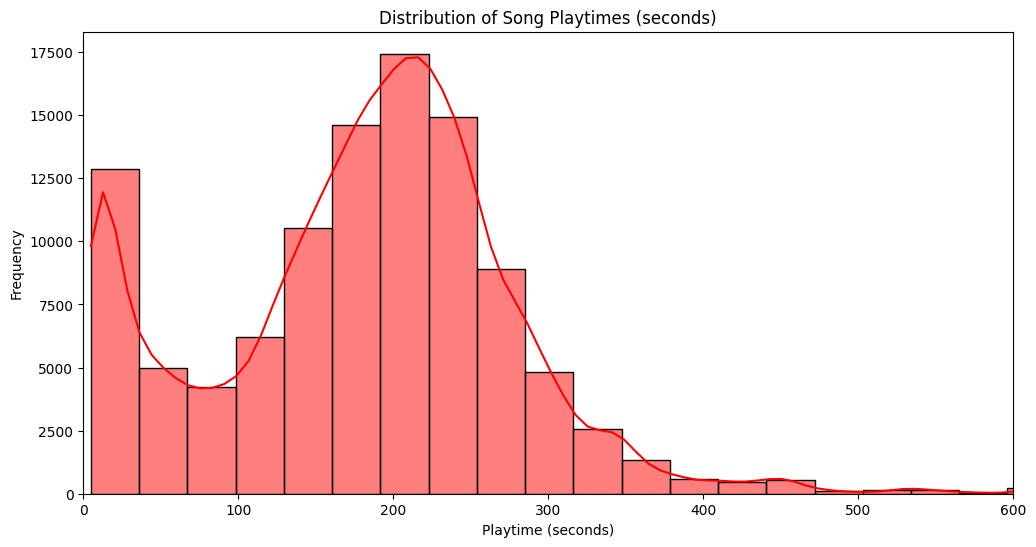

In [6]:
df['ts'] = pd.to_datetime(df['ts'])
df['playtime_seconds'] = df['ms_played'] / 1000
filtered_df = df[df['playtime_seconds'] >= 5]
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(filtered_df['playtime_seconds'], bins=50, kde=True, ax=ax, color="red")
ax.set_title('Distribution of Song Playtimes (seconds)')
ax.set_xlabel('Playtime (seconds)')
ax.set_ylabel('Frequency')
ax.set_xlim(0, 600)
plt.show()

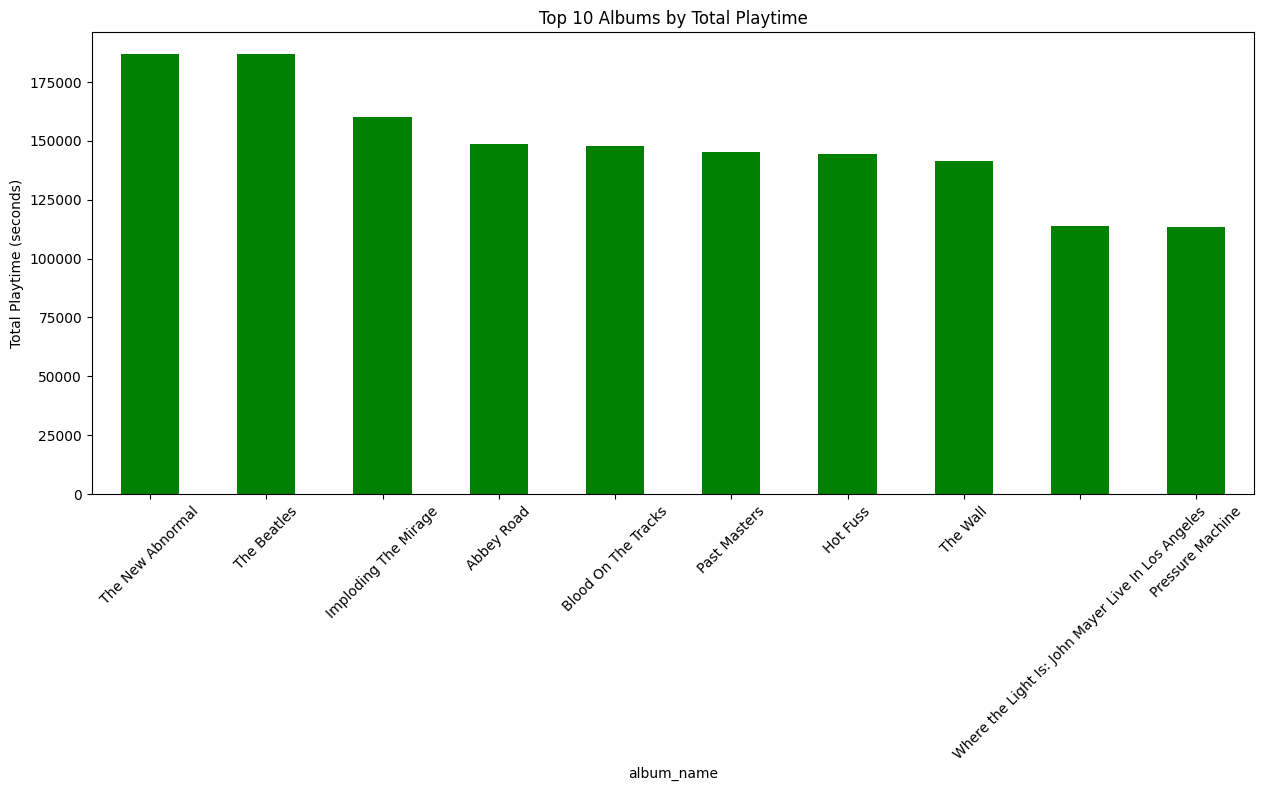

In [14]:
top_albums = df.groupby('album_name')['playtime_seconds'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(15, 6))
top_albums.plot(kind='bar',color='green')
plt.title('Top 10 Albums by Total Playtime')
plt.ylabel('Total Playtime (seconds)')
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_100689/3562713412.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_activity.index, y=hourly_activity.values ,palette='viridis')


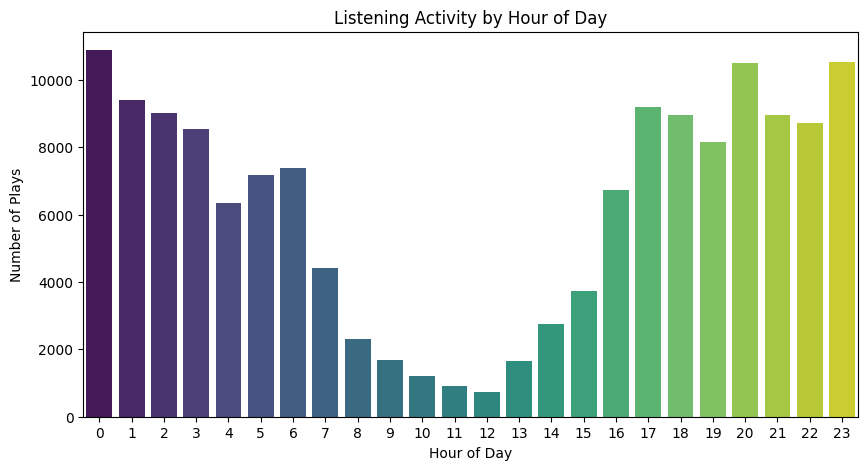

In [15]:
df['hour'] = df['ts'].dt.hour
hourly_activity = df.groupby('hour').size()

plt.figure(figsize=(10, 5))
sns.barplot(x=hourly_activity.index, y=hourly_activity.values ,palette='viridis')
plt.title('Listening Activity by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Plays')
plt.show()

## Most Frequent Platforms

/tmp/ipykernel_100689/2566468348.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platform_counts.values, y=platform_counts.index, ax=ax, palette="Set2")


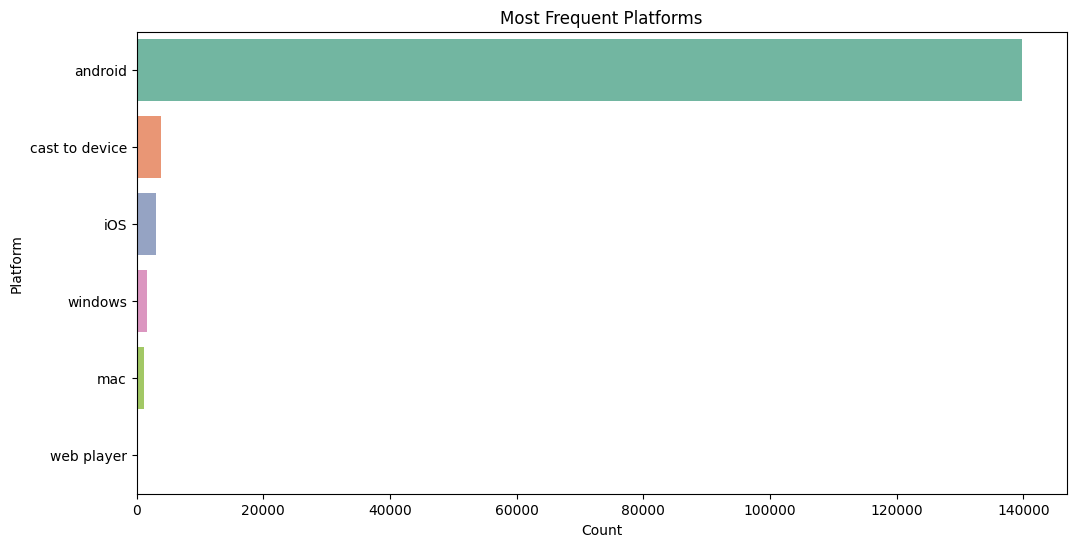

In [9]:
if 'platform' in df.columns:
    platform_counts = df['platform'].value_counts().head(10)
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.barplot(x=platform_counts.values, y=platform_counts.index, ax=ax, palette="Set2")
    ax.set_title('Most Frequent Platforms')
    ax.set_xlabel('Count')
    ax.set_ylabel('Platform')
    plt.show()
else:
    print("Platform information is not available in the dataset.")

## Time of Day Analysis

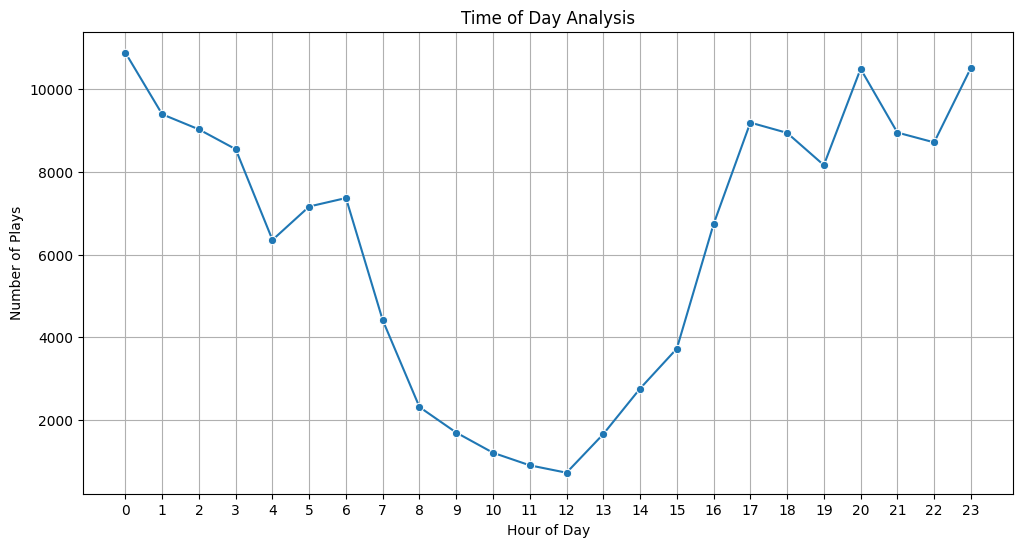

In [10]:
df['hour'] = df['ts'].dt.hour
hour_counts = df['hour'].value_counts().sort_index()
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x=hour_counts.index, y=hour_counts.values, marker='o', ax=ax)
ax.set_title('Time of Day Analysis')
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Number of Plays')
ax.set_xticks(range(24))
ax.grid(True)
plt.show()